In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('data_files/merged_with_features.parquet', engine='pyarrow')
df.sample(15)

,duration_in_min,city_address,datetime,hour_temp,hour_windspeed,hour_winddir,hour_precip,hour_humidity,hour_pressure,hour_cloudcover,...,hour_dew,day_precipcover,day_precip,day,is_alarm,isw_vector,telegram_vector,alarm_num_atm,alarm_num_region,dist_from_front
600144,0.0,Uzhgorod,2025-02-16 06:00:00,-5.5,4.1,339.0,0.0,75.16,1022.5,47.8,...,-9.2,16.67,0.341,2025-02-16,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.07632669456361003, -0.019453840690966173, ...",4,0,0.000000
225477,0.0,Kyiv oblast,2023-04-20 01:00:00,8.6,11.5,47.0,0.0,64.58,1015.0,100.0,...,2.3,4.17,1.000,2023-04-20,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.008453426089327911, -0.03061092502027816, ...",2,0,0.926038
461883,0.0,Lutsk,2024-06-18 02:00:00,14.7,8.3,249.2,0.0,87.81,1017.0,0.0,...,12.7,8.33,0.300,2024-06-18,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.004153445284868704, -0.07018083031619406, -...",1,0,0.442290
362056,0.0,Kherson,2023-12-21 08:00:00,6.2,0.0,226.9,0.0,100.00,1004.9,100.0,...,6.2,0.00,0.000,2023-12-21,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04751409216096704, -0.08531009525079036, -0...",2,7,0.980612
176905,0.0,Kyiv oblast,2023-01-17 09:00:00,3.1,17.6,143.3,0.0,95.16,1004.0,100.0,...,2.4,4.17,0.700,2023-01-17,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.09074722126894041, 0.037756219872872226, 0....",0,0,0.926038
47031,0.0,Ivano-Frankivsk,2022-05-20 04:00:00,4.1,4.6,229.4,0.0,89.95,1027.0,8.7,...,2.6,0.00,0.000,2022-05-20,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.010871970966874062, -0.02787301863708187, ...",3,3,0.299830
10273,0.0,Ivano-Frankivsk,2022-03-14 05:00:00,-3.3,4.0,137.5,0.0,85.39,1035.0,0.0,...,-5.4,0.00,0.000,2022-03-14,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.020873769110350937, -0.0452936985991318, 0....",0,1,0.299830
598746,0.0,Rivne,2025-02-13 20:00:00,-1.0,10.7,140.0,0.0,66.43,1018.8,10.0,...,-6.5,0.00,0.000,2025-02-13,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.05311178983978951, -0.023208573737395606, ...",6,0,0.560432
264687,0.0,Cherkasy,2023-06-29 10:00:00,15.6,20.5,254.9,0.1,81.79,1006.0,82.5,...,12.5,50.00,4.100,2023-06-29,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.020850534572126926, -0.03821618141405372, -...",1,3,0.857101
580146,0.0,Donetsk,2025-01-12 08:00:00,-1.2,10.4,336.6,0.2,100.00,1019.0,100.0,...,-1.2,50.00,2.900,2025-01-12,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.329057992005738, 0.18295869640094162, -0.03...",0,4,0.979277


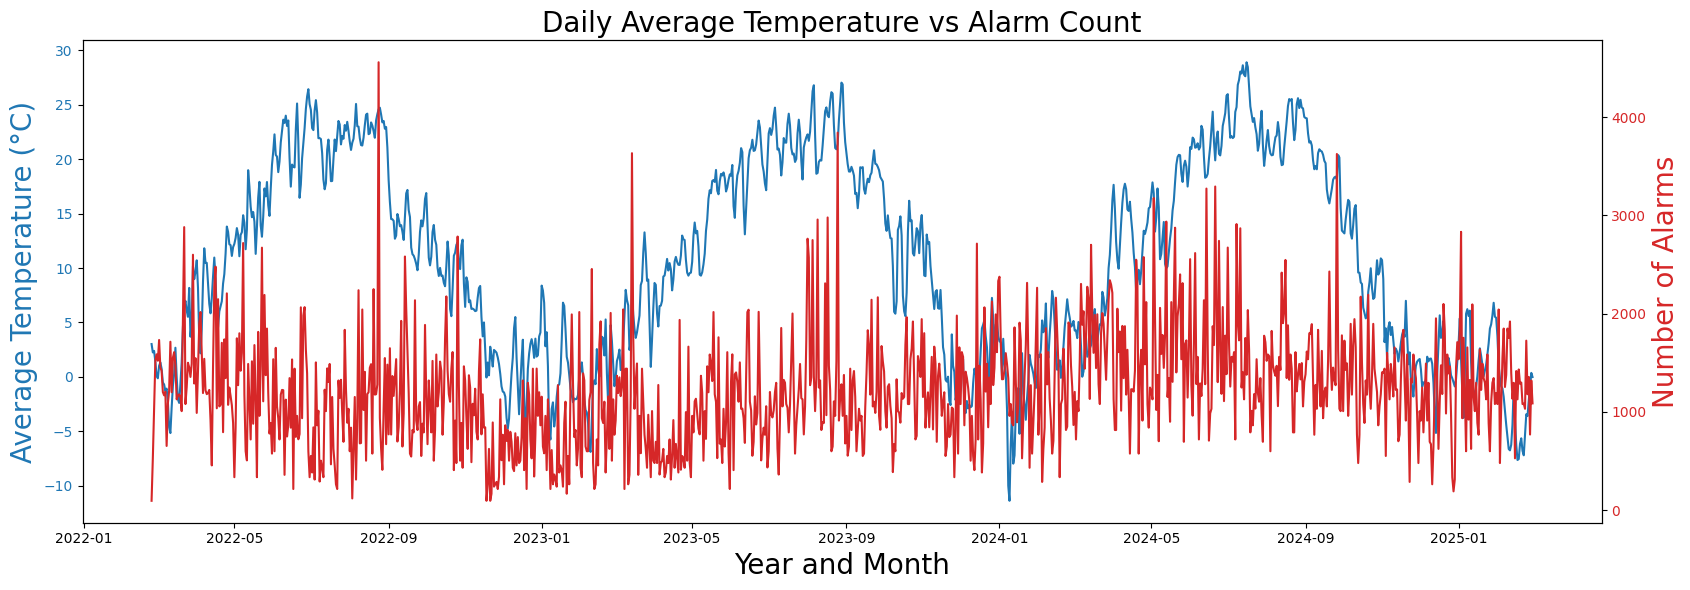

In [22]:
a = df[['datetime', 'hour_temp', 'alarm_num_atm']].copy()
    # if i == 2:
    #     a = a[a['datetime'] >= pd.to_datetime("2024-05-01")]
a['date'] = df['datetime'].dt.date
daily_avg_temp = a.groupby('date')['hour_temp'].mean().reset_index()
daily_avg_temp.columns = ['date', 'avg_temp']
    
daily_alarm_sum = a.groupby('date')['alarm_num_atm'].sum().reset_index()
daily_stats = pd.merge(daily_avg_temp, daily_alarm_sum, on='date')
    
fig, ax1 = plt.subplots(figsize=(17, 6))
    
ax1.set_xlabel('Year and Month', fontsize=20)
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue', fontsize=20)
ax1.plot(daily_stats['date'], daily_stats['avg_temp'], color='tab:blue', label='Avg Temp')
ax1.tick_params(axis='y', labelcolor='tab:blue')
    
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Alarms', color='tab:red', fontsize=20)
ax2.plot(daily_stats['date'], daily_stats['alarm_num_atm'], color='tab:red', label='Alarms')
ax2.tick_params(axis='y', labelcolor='tab:red')
    
plt.title('Daily Average Temperature vs Alarm Count', fontsize=20)
fig.tight_layout()
plt.show()


In [8]:
# a few lines on one plot per every region(regions are xticks) 1) alarm_num_region 2) winddir 3) humidity

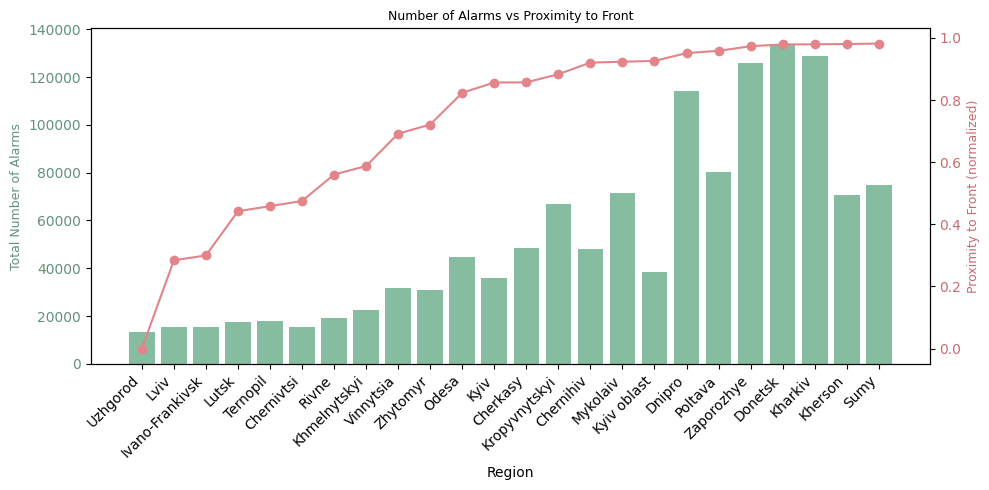

In [25]:
# distance x alarm_num_region

grouped = df.groupby('city_address').agg({'alarm_num_region': 'sum', 'dist_from_front': 'first'}).reset_index()
grouped = grouped.sort_values('dist_from_front')
    
fig, ax = plt.subplots(figsize=(10, 5))
    
ax.bar(grouped['city_address'], grouped['alarm_num_region'], color='#86bda0')
ax.set_ylabel('Total Number of Alarms', color='#639179', fontsize=9)
ax.set_xlabel('Region')
ax.tick_params(axis='y', labelcolor='#639179')
ax.set_title('Number of Alarms vs Proximity to Front', fontsize=9)
    
ax2 = ax.twinx()
ax2.plot(grouped['city_address'], grouped['dist_from_front'], color='#e3848a', marker='o', label='Proximity to Front')
ax2.set_ylabel('Proximity to Front (normalized)', color='#c76d73', fontsize=9)
ax2.tick_params(axis='y', labelcolor='#c76d73')

ax.set_xticks(range(len(grouped['city_address'])))
ax.set_xticklabels(grouped['city_address'], rotation=45, ha='right')
fig.tight_layout()
plt.show()
